ДЗ 6. Multivariate linear regression

1. Предсказать цену машины по исходным данным.
2. Сделать анализ колонок, посмотреть сколько уникальных значений, сколько пропущенных значений, все ли значения валидны.
3. Использовать разбиение данных: 70% на тренировочные, 30% на данные для теста.
4. Определить какие колонки и как влияют на результат. Нужны ли нам все колонки из этого датасета?
5. Построить графики, показывающие зависимость года выпуска машины и её цены.
6. Метрикой выбрать RMSE.

Опционально на выбор:
1.	Попробовать добавить новые признаки в модель (полиномиальные признаки, комбинации колонок). Посмотреть как это влияет на финальную метрику.
2.	Построить матрицу корреляций. Что вы можете по ней сказать?
3. Попробовать One-hot encoding на категориальные признаки. Описать выводы - стало ли лучше? Почему?

In [1]:
# Import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

%matplotlib inline

### -Load the data

Данные содержат следующие столбцы:

* Price   : Розничная цена
* Year    : Год выпуска
* Mileage : Пробег в милях
* City    : Город, в котором продается авто
* State   : Штат	
* Vin     : Идентификационный номер транспортного средства
* Make    : Производитель авто
* Model   : Модель авто

In [2]:
# Read in the true_car_listings_prepeared.csv file as a DataFrame called car.
car = pd.read_csv("true_car_listings_prepeared.csv")

### -Data analysis and processing


In [3]:
# Начало DataFrame car
car.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
# Общая информация
car.info()

# обшее количество колонок - 8
# количество сэмплов/строк - 852122
# колонки Price-Year-Mileage - имеют числовой тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    852122 non-null  int64  
 1   Year     852122 non-null  int64  
 2   Mileage  731179 non-null  float64
 3   City     852122 non-null  object 
 4   State    852122 non-null  object 
 5   Vin      852122 non-null  object 
 6   Make     852122 non-null  object 
 7   Model    775000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.0+ MB


In [5]:
len(car)

852122

In [6]:
car.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [7]:
car.shape

(852122, 8)

In [8]:
# Типы данных
car.dtypes

Price        int64
Year         int64
Mileage    float64
City        object
State       object
Vin         object
Make        object
Model       object
dtype: object

In [9]:
# Краткая статистика
car.describe()

# в колонке Price есть 0-е значения, которые следует исправить (удалить или заменить)

,Price,Year,Mileage
count,852122.000000,852122.000000,7.311790e+05
mean,20121.167199,2013.289145,5.251923e+04
std,14123.100298,3.414987,4.203614e+04
min,0.000000,1997.000000,5.000000e+00
25%,11997.000000,2012.000000,2.383600e+04
50%,17900.000000,2014.000000,4.026500e+04
75%,26397.000000,2016.000000,7.222700e+04
max,499500.000000,2018.000000,2.856196e+06


In [10]:
# Список городов
car["City"].unique(), car["City"].nunique()

(array(['El Paso', 'Long Island City', 'Windsor', ..., 'Winslow',
        'Bergenfield', 'Belmont'], dtype=object),
 2553)

In [11]:
# Сделаем обработку данных списка городов и сравним
# Используем стиль title()-каждое слово с заглавной буквы, для городов со сдвоенным названием, 
# и удалим пробелы слева и справа в названии, если есть
car["City"] = car["City"].str.lstrip()
car["City"] = car["City"].str.rstrip()
car["City"] = car["City"].str.title()

In [12]:
# В результате обработки количество уникальных названии горов уменьшилось с 2553 до 2408
# Убрали не валидные данные в car["City"]
car["City"].unique(), car["City"].nunique()

(array(['El Paso', 'Long Island City', 'Windsor', ..., 'Winslow',
        'Bergenfield', 'Belmont'], dtype=object),
 2408)

In [13]:
# Список штатов
car["State"].unique(), car["State"].nunique()

(array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
        ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
        ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
        ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
        ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
        ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
        ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object),
 59)

In [14]:
# Проведем теже действия с данными в car["State"]
# Используем стиль upper()-вся абривиатура с заглавными,
# и удалим пробелы слева и справа в названии
car["State"] = car["State"].str.lstrip()
car["State"] = car["State"].str.rstrip()
car["State"] = car["State"].str.upper()

In [15]:
# В результате обработки количество уникальных названии штатов уменьшилось с 59 до 51
# Убрали не валидные данные в car["State"]
car["State"].unique(), car["State"].nunique()

(array(['TX', 'NY', 'CO', 'UT', 'FL', 'CT', 'ID', 'ND', 'CA', 'NJ', 'OH',
        'VA', 'IN', 'AZ', 'OR', 'KS', 'NE', 'MA', 'MD', 'GA', 'MN', 'HI',
        'LA', 'NM', 'IL', 'AL', 'PA', 'SC', 'NC', 'WA', 'WI', 'OK', 'KY',
        'MS', 'MO', 'ME', 'AR', 'MI', 'NV', 'TN', 'NH', 'DE', 'WV', 'VT',
        'SD', 'IA', 'RI', 'MT', 'DC', 'AK', 'WY'], dtype=object),
 51)

In [16]:
# Производитель авто
car["Make"].unique(), car["Make"].nunique()

(array(['Acura', 'Alfa', 'AM', 'Aston', 'Audi', 'Bentley', 'BMW', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'FIAT',
        'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'GMC', 'Honda',
        'HUMMER', 'Hyundai', 'INFINITI', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
        'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury', 'MINI',
        'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
        'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
        'smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 58)

In [17]:
# Используем стиль title()-каждое слово с заглавной буквы, для производителей со сдвоенным названием, 
# и удалим пробелы слева и справа в названии
car["Make"] = car["Make"].str.lstrip()
car["Make"] = car["Make"].str.rstrip()
car["Make"] = car["Make"].str.title()

In [18]:
# В данные в столбце car["Make"] были правильны (58 проиводителей авто), но зато привели к общему виду
car["Make"].unique(), car["Make"].nunique()

(array(['Acura', 'Alfa', 'Am', 'Aston', 'Audi', 'Bentley', 'Bmw', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'Fiat',
        'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'Gmc', 'Honda',
        'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
        'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
        'Maybach', 'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mercury', 'Mini',
        'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
        'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion',
        'Smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 58)

In [19]:
# Модель
car["Model"].unique(), car["Model"].nunique(), 

(array(['ILX6-Speed', 'ILX5-Speed', 'ILXAutomatic', ..., 'S90T6', 'V90',
        'XC90T8'], dtype=object),
 2694)

In [20]:
# Используем стиль title()-каждое слово с заглавной буквы, для марак авто со сдвоенным названием, 
# и удалим пробелы слева и справа в названии
car["Model"] = car["Model"].str.lstrip()
car["Model"] = car["Model"].str.rstrip()
car["Model"] = car["Model"].str.title()

In [21]:
# Количество моделей авто изменилось с 2694 до 2660 (34 невадныех значения),
# и отсуствуют 77122 значении
car["Model"].unique(), car["Model"].nunique(), 

(array(['Ilx6-Speed', 'Ilx5-Speed', 'Ilxautomatic', ..., 'S90T6', 'V90',
        'Xc90T8'], dtype=object),
 2660)

In [22]:
# Идентификационный номер транспортного средства
car["Vin"].unique(), car["Vin"].nunique(), len(car["Vin"])

(array(['19VDE2E53EE000083', '19VDE1F52DE012636', '19VDE2E52DE000025', ...,
        'YV4A22PL4G1000868', 'YV4A22NLXH1006162', 'YV4BC0ZX1H1109845'],
       dtype=object),
 852075,
 852122)

In [23]:
# Используем стиль Upper()-все значения VIN заглавными
# и удалим пробелы слева и справа в названии
car["Vin"] = car["Vin"].str.lstrip()
car["Vin"] = car["Vin"].str.rstrip()
car["Vin"] = car["Vin"].str.upper()

In [24]:
# Количество значении не поменялось, 
car["Vin"].unique(), car["Vin"].nunique(), len(car["Vin"])

(array(['19VDE2E53EE000083', '19VDE1F52DE012636', '19VDE2E52DE000025', ...,
        'YV4A22PL4G1000868', 'YV4A22NLXH1006162', 'YV4BC0ZX1H1109845'],
       dtype=object),
 852075,
 852122)

In [25]:
# но имеется повторяющиеся значения - 47, оставим как есть
852075 - 852122

-47

In [26]:
# Список годов выпуска машин
# Года выпусков машин лежат в интервале с 1997 - 2018
car["Year"].unique(), car["Year"].nunique()

(array([2014, 2013, 2016, 2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008,
        2004, 2017, 2005, 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997],
       dtype=int64),
 22)

In [27]:
# В столбце "Price" имеются 0-е значения в количестве 53308
len(car[car["Price"]==0])

53308

In [28]:
# В столбце "Mileage" имеются пропуски в количестве - 120943
car["Mileage"].isna().sum()

120943

In [29]:
# В столбцах "Price" и "Mileage", которые будем использовать в построении моделей имеются не валидные данные
# Воспользуемся двумя методами:
# 1. Удалим все не валидные данные (dropna())
# 2. Заменим все не валидные данные (fillna())
# Сравним матрицы корреляции и выберем оптимальный вариант

In [30]:
# Построим матрицу корреляции по исходным данным
# Цена зависит от года производства авто и пробега
car.corr()

# Stage 1
# Year 0.362441 	Mileage -0.381000

,Price,Year,Mileage
Price,1.000000,0.362441,-0.381000
Year,0.362441,1.000000,-0.764475
Mileage,-0.381000,-0.764475,1.000000


In [31]:
# Скопируем датасет, и удалим не валидные данные в столбцах "Price" и "Mileage" 

In [32]:
v1_car = car.copy(deep=True)
v1_car.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,Ilx6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,Ilx5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,Ilx6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,Ilx5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,Ilxautomatic


In [33]:
# Удалим NaN - значения для "Mileage"
v1_car.dropna(subset = ["Mileage"], inplace=True)

In [34]:
# Проверяем на NaN
v1_car["Mileage"].isna().sum()

0

In [35]:
# Удалим 0-e - значения для "Price"
v1_car = v1_car[v1_car.Price != 0]

In [36]:
# Проверяем что нет 0-х - значении
v1_car.describe()

,Price,Year,Mileage
count,685505.00000,685505.000000,6.855050e+05
mean,21462.72811,2013.290860,5.250190e+04
std,13540.75804,3.413445,4.198496e+04
min,1500.00000,1997.000000,5.000000e+00
25%,13041.00000,2012.000000,2.383500e+04
50%,18500.00000,2014.000000,4.025000e+04
75%,26995.00000,2016.000000,7.216800e+04
max,490000.00000,2018.000000,2.856196e+06


In [37]:
# Построим матрицу корреляции удалив Nan и 0 значения
v1_car.corr()

# Stage 2 (Удаление)
# Year 0.402430 	Mileage -0.423102

,Price,Year,Mileage
Price,1.000000,0.402430,-0.423102
Year,0.402430,1.000000,-0.765412
Mileage,-0.423102,-0.765412,1.000000


In [38]:
# Скопируем датасет, и заменим не валидные данные в столбцах "Price" и "Mileage" 

In [39]:
v2_car = car.copy(deep=True)
v2_car.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725.0,El Paso,TX,19VDE2E53EE000083,Acura,Ilx6-Speed
1,10888,2013,NaN,Long Island City,NY,19VDE1F52DE012636,Acura,Ilx5-Speed
2,8995,2013,48851.0,El Paso,TX,19VDE2E52DE000025,Acura,Ilx6-Speed
3,10999,2014,39922.0,Windsor,CO,19VDE1F71EE003817,Acura,Ilx5-Speed
4,0,2016,NaN,Lindon,UT,19UDE2F32GA001284,Acura,Ilxautomatic


In [40]:
# Заменим NaN - значения для "Mileage" средним значением
v2_car['Mileage'] = v2_car['Mileage'].fillna((v2_car['Mileage'].mean()))

In [41]:
# Проверяем на NaN
v2_car["Mileage"].isna().sum()

0

In [42]:
# Заменим 0-e - значения для "Price" средним значением
v2_car['Price'].replace(0,v2_car['Price'].mean(axis=0),inplace=True)

In [43]:
# Проверяем что нет 0-х - значении
v1_car.describe()

,Price,Year,Mileage
count,685505.00000,685505.000000,6.855050e+05
mean,21462.72811,2013.290860,5.250190e+04
std,13540.75804,3.413445,4.198496e+04
min,1500.00000,1997.000000,5.000000e+00
25%,13041.00000,2012.000000,2.383500e+04
50%,18500.00000,2014.000000,4.025000e+04
75%,26995.00000,2016.000000,7.216800e+04
max,490000.00000,2018.000000,2.856196e+06


In [44]:
# Построим матрицу корреляции заменив Nan и 0 значения
v2_car.corr()

# Stage 3 (Замена)
# Year 0.389132 	Mileage -0.378348

,Price,Year,Mileage
Price,1.000000,0.389132,-0.378348
Year,0.389132,1.000000,-0.707821
Mileage,-0.378348,-0.707821,1.000000


In [45]:
# Stage 1 car    (Оригинал)
# Year 0.362441 	Mileage -0.381000

# Stage 2 v1_car (Удаление)
# Year 0.402430 	Mileage -0.423102

# Stage 3 v2_car (Замена)
# Year 0.389132 	Mileage -0.378348

# Сравнив коэффициенты, оптимальным результатом для данного сета является удаление не валидных данных
# Далее будем использовать dataset v1_car

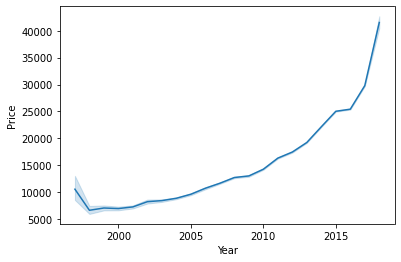

In [46]:
# График зависимости цены от года производства машины
sns.lineplot(x=v1_car['Year'], y=v1_car['Price']);

In [47]:
#sns.lineplot(x=v1_car['Mileage'], y=v1_car['Price'])

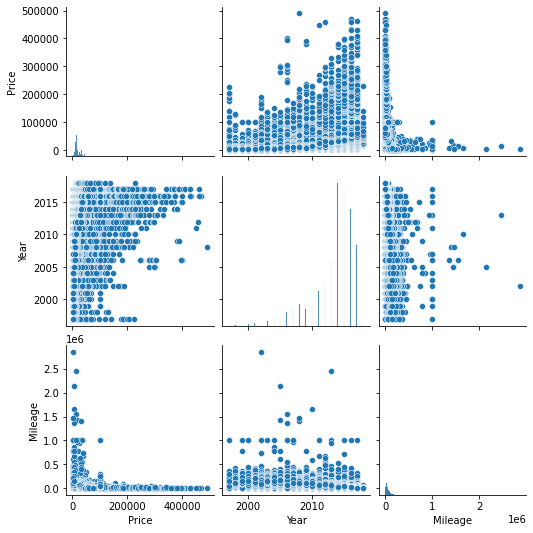

In [48]:
# Plot pairwise relationships in a dataset
sns.pairplot(v1_car)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

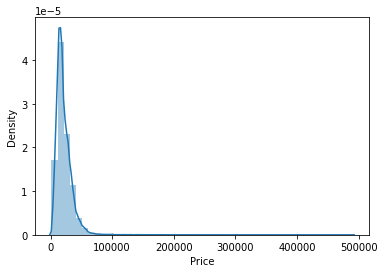

In [49]:
sns.distplot(v1_car["Price"])

<AxesSubplot:>

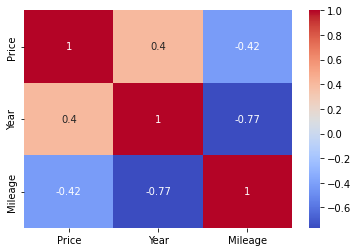

In [50]:
# Матрица корреляции для v1_car
sns.heatmap(v1_car.corr(), annot=True, cmap="coolwarm")

### Training a Linear Regression Model
### X and y arrays

In [51]:
# load the data and turn X and y into numpy arrays

# inputs / Массив X, содержит признаки для обучения ("Mileage", "Year").
X = v1_car[["Mileage", "Year"]].values
# outputs / Массив у с целевой переменной ("Price").
y = v1_car["Price"].values

In [52]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

## Creating and Training the Model

In [53]:
# Instantiate a classifer and train it
m_linear_model = LinearRegression()

In [54]:
m_linear_model.fit(X_train,y_train)

LinearRegression()

In [55]:
# print the intercept
print(m_linear_model.intercept_)

-1510280.0216477928


In [56]:
m_linear_model.coef_, m_linear_model.intercept_

(array([-8.85703572e-02,  7.63125655e+02]), -1510280.0216477928)

In [57]:
# Model performance evaluation 
m_linear_model.score(X_test, y_test)

0.1903101429121059

In [58]:
# Linear equation Y_hat = k0x0 + k1x1 + b

print(f"Y_hat = ({m_linear_model.coef_[0]}) * X[Mileage] + ({m_linear_model.coef_[1]}) * X[Year] + {m_linear_model.intercept_}")

Y_hat = (-0.08857035724912617) * X[Mileage] + (763.1256550236054) * X[Year] + -1510280.0216477928


## Regression Evaluation Metrics



MAE:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

MSE:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

RMSE:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [59]:
predictions = m_linear_model.predict(X_test)

In [60]:
#MAE- среднее значение абсолютной величины ошибоки
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 7838.520919277479


In [61]:
#MSE - среднее значение квадрата ошибок
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 151382058.58673704


In [62]:
#RMSE - квадратный корень из средней квадратичной ошибки
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 12303.741649869646


Summary:

1. Опредиление задачи (Перед построением моделей всегда необходимо проводить подготовку данных)
2. Обработка данных
3. Оценка подготовки данных
4. Построение моделей / моделирование
5. Проверка / эксперименты с моделью (Также важно опредилиться с типом используемой модели.)

Также в данном датасете можно установить дополнительные зависимости:
    
- штат - в Техасе продаются больше пикапов, в NY больше седанов
- отечественный производитель или нет - ценность иномарок больше в любой стране
- тип кузова - пикап, седан, купу, внедорожник
- производитель - к примеру Opel выпускает недорогие доступные авто, а McLaren только спорткары
- такжу внутри производителя возможны дополнительные зависимости - Mercedes C-class и Mercedes S-class
- ...